In [2]:
%load_ext autoreload
%autoreload 2
import requests
import io
from pymolint import  mol_int
# import numpy as np
# import sys
from pytexshade import ipyshade
# from seqplot.p9tools import 
import MDAnalysis as mda
from seqplot.pdb_plot import plot_prof4pdb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
h=io.StringIO(requests.get('https://files.rcsb.org/download/1KX5.pdb').content.decode("utf-8") )

In [4]:
struct=mda.Universe(h,format='PDB')

/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: MN
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [8]:
d=mol_int.struct2cont(struct,'segid B and protein','nucleic')

0it [00:00, ?it/s]


In [10]:
df=d.get_df()

In [11]:
df

,A_atom_id,A_atom_name,A_resname,A_segid,A_resid,B_atom_id,B_atom_name,B_resname,B_segid,B_resid,dist,Time
0,7365,NH1,ARG,B,36,1223,P,DA,I,-13,3.688779,0
1,7364,CZ,ARG,B,36,1224,OP1,DA,I,-13,3.517523,0
2,7365,NH1,ARG,B,36,1224,OP1,DA,I,-13,3.285111,0
3,7366,NH2,ARG,B,36,1224,OP1,DA,I,-13,2.872054,0
4,7329,CB,PRO,B,32,1225,OP2,DA,I,-13,3.450700,0
...,...,...,...,...,...,...,...,...,...,...,...,...
130,7706,N,LYS,B,79,5080,OP2,DC,J,28,3.583109,0
131,7700,CG,ARG,B,78,5081,O5',DC,J,28,3.665597,0
132,7701,CD,ARG,B,78,5081,O5',DC,J,28,3.722939,0
133,7719,CB,THR,B,80,5082,C5',DC,J,28,3.744557,0


In [13]:
dp=d.get_num_int_profile()

In [14]:
dp

,segid,resid,num_int
0,B,5,7.0
1,B,6,2.0
2,B,8,4.0
3,B,9,3.0
4,B,10,1.0
5,B,14,1.0
6,B,15,1.0
7,B,16,9.0
8,B,17,17.0
9,B,18,3.0


Starting resid 1
CPU times: user 8.93 s, sys: 101 ms, total: 9.03 s
Wall time: 15.9 s


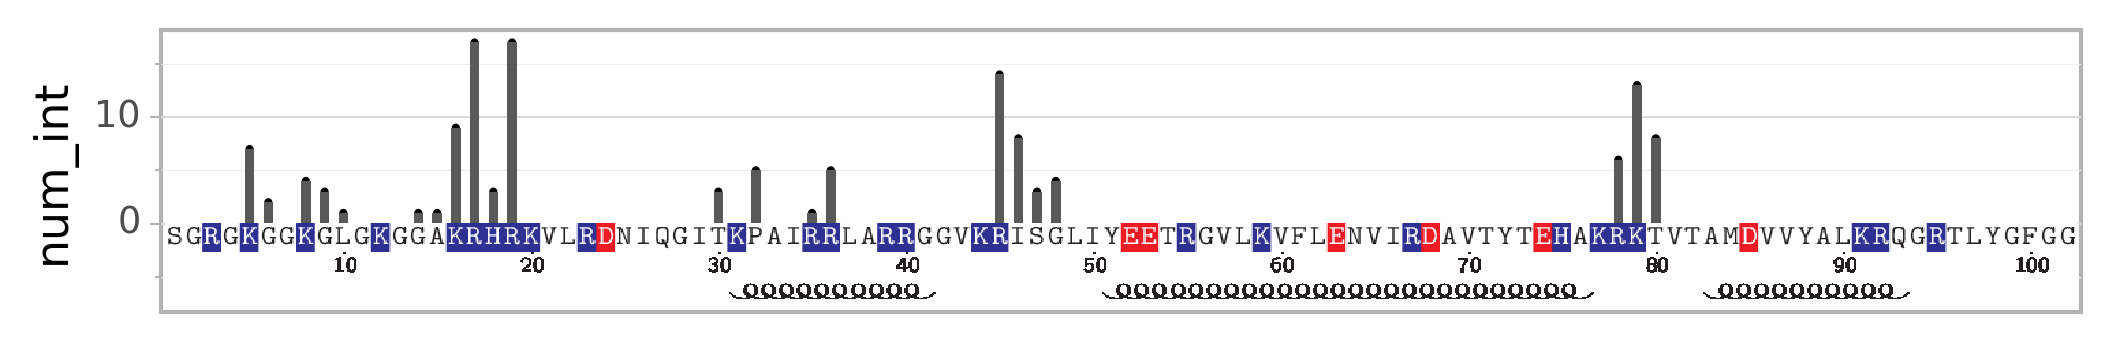

<ggplot: (8774699024227)>

In [16]:
%%time
import warnings
warnings.filterwarnings('ignore')
plot_prof4pdb(pdb_chain_id='1KX5_B',column='num_int',data=dp,ymin=0,feature_types=['SecStr'])

Exception ignored in: <function ReaderBase.__del__ at 0x7f29ee8661e0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/MDAnalysis/coordinates/base.py", line 2106, in __del__
    self.close()
  File "/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py", line 424, in close
    self._pdbfile.close()
  File "/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/MDAnalysis/lib/util.py", line 736, in close
    self.flush()
  File "/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/MDAnalysis/lib/util.py", line 842, in flush
    return self.stream.flush()
ValueError: I/O operation on closed file.


CPU times: user 2.82 s, sys: 184 ms, total: 3 s
Wall time: 8.16 s


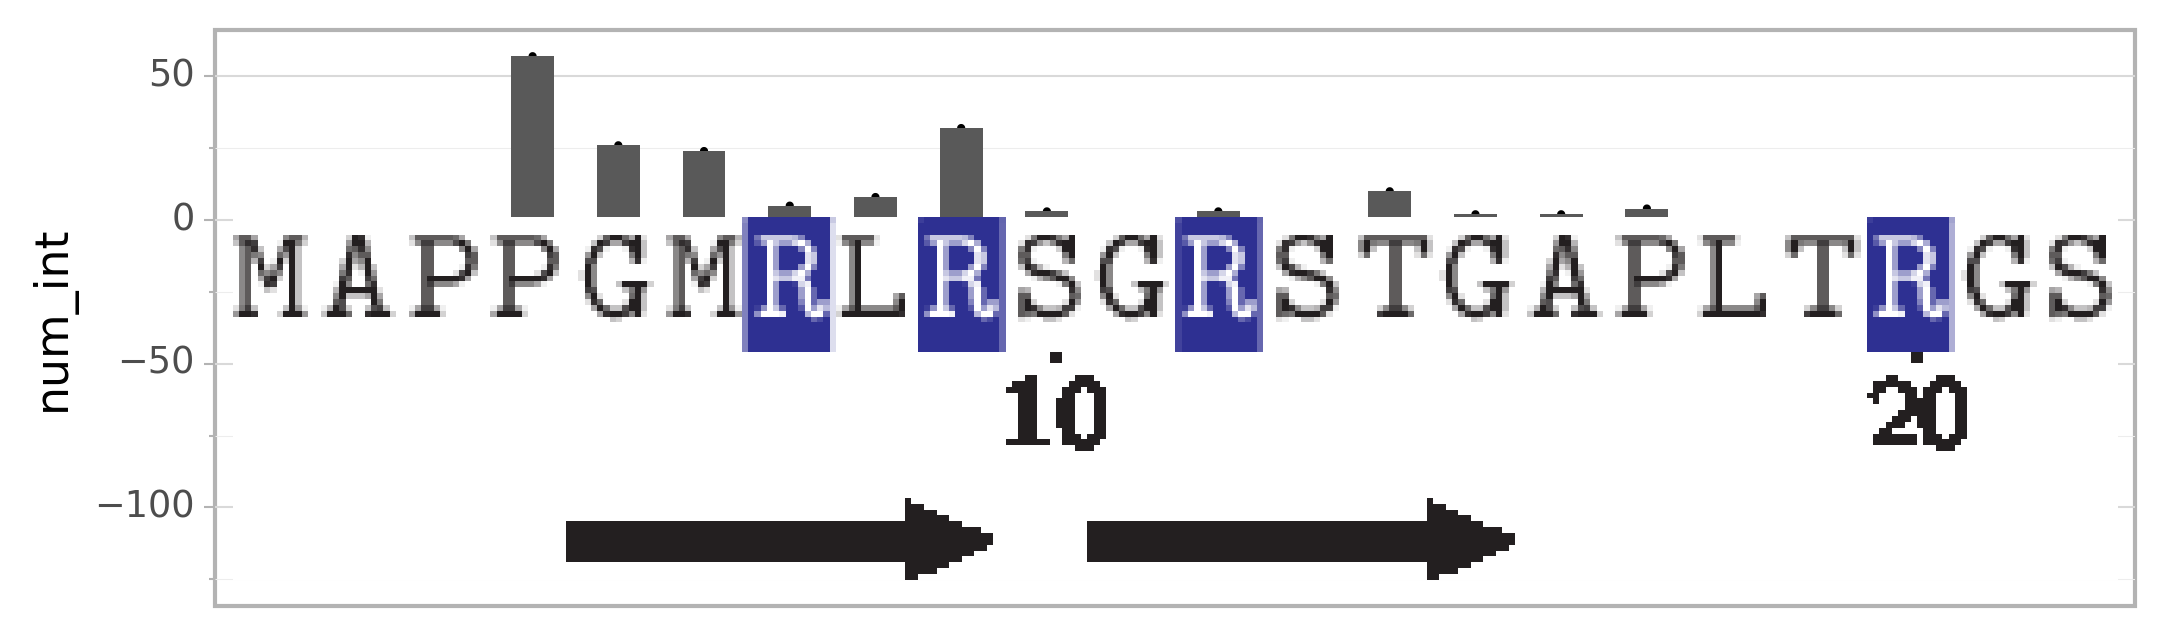

<ggplot: (8738737358600)>

In [42]:
%%time
import warnings
warnings.filterwarnings('ignore')
h=io.StringIO(requests.get('https://files.rcsb.org/download/1ZLA.pdb').content.decode("utf-8") )
dp=struct_int.struct2cont(h,'segid K and protein',format='pdb').get_num_int_profile()
plot_prof4pdb(pdb_chain_id='1ZLA_K',column='num_int',data=dp,ymin=0,feature_types=['SecStr'],aspect_ratio=0.3)